In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\Users\sumet\Downloads\student-mat.csv", sep=";")


In [10]:
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
print("Missing Values:\n", df.isnull().sum())
print("\nColumn Data Types:\n", df.dtypes)
print("\nDataset Shape:", df.shape)

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Column Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
h

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  
        df[col].fillna(df[col].median(), inplace=True)


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
average_g3 = df['G3'].mean()
high_scorers = df[df['G3'] > 15].shape[0]
studytime_g3_corr = df[['studytime', 'G3']].corr().iloc[0,1]
average_g3_male = df[df['sex'] == 'M']['G3'].mean()
average_g3_female = df[df['sex'] == 'F']['G3'].mean()

print("\nAverage Final Grade (G3):", average_g3)
print("Students Scoring Above 15 in G3:", high_scorers)
print("Correlation Between Study Time and Final Grade (G3):", studytime_g3_corr)
print("\nAverage G3 for Male Students:", average_g3_male)
print("Average G3 for Female Students:", average_g3_female)


Average Final Grade (G3): 10.415189873417722
Students Scoring Above 15 in G3: 40
Correlation Between Study Time and Final Grade (G3): 0.09781968965319622

Average G3 for Male Students: 10.914438502673796
Average G3 for Female Students: 9.966346153846153


In [16]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

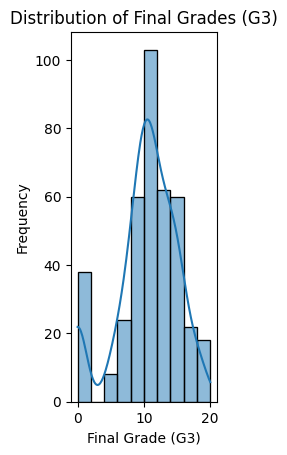

In [17]:
plt.subplot(1, 3, 1)
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Final Grade (G3)')

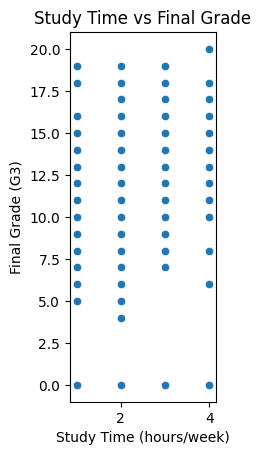

In [18]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['studytime'], y=df['G3'])
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (hours/week)")
plt.ylabel("Final Grade (G3)")

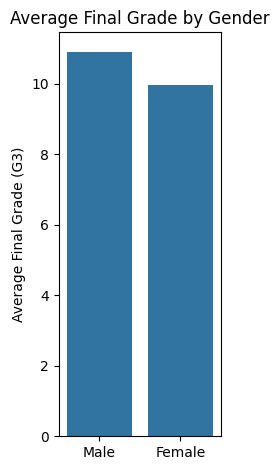

In [19]:
plt.subplot(1, 3, 3)
sns.barplot(x=['Male', 'Female'], y=[average_g3_male, average_g3_female])
plt.title("Average Final Grade by Gender")
plt.ylabel("Average Final Grade (G3)")

plt.tight_layout()
plt.show()